### 라이브러리 추가

In [1]:
import os
import time
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 불러오기

In [2]:
train = pd.read_csv(r'C:\Users\kolan\github\DataScience\exam_score\data\train.csv')
test = pd.read_csv(r'C:\Users\kolan\github\DataScience\exam_score\data\test.csv')

print(f"Train 데이터 크기:", (train.shape))
print(f"Test 데이터 크기:", (test.shape))

Train 데이터 크기: (630000, 13)
Test 데이터 크기: (270000, 12)


In [16]:
train.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [17]:
test.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
0,630000,24,other,ba,6.85,65.2,yes,5.2,poor,group study,high,easy
1,630001,18,male,diploma,6.61,45.0,no,9.3,poor,coaching,low,easy
2,630002,24,female,b.tech,6.60,98.5,yes,6.2,good,group study,medium,moderate
3,630003,24,male,diploma,3.03,66.3,yes,5.7,average,mixed,medium,moderate
4,630004,20,female,b.tech,2.03,42.4,yes,9.2,average,coaching,low,moderate


### 결측치 확인

In [3]:
train.isnull().sum()

id                  0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [20]:
import pandas as pd

# =========================
# 수치형 컬럼별 고정 구간 정의
# =========================
NUMERIC_BINS = {
    "age": [17, 18, 19, 20, 21, 22, 23, 24, 25],

    "study_hours": [0, 1, 2, 3, 4, 5, 6, 7, 8],

    "class_attendance": [40, 50, 60, 70, 80, 90, 100],

    "sleep_hours": [4, 5, 6, 7, 8, 9, 10],

    "exam_score": [0, 40, 50, 60, 70, 80, 90, 100]
}

# =========================
# 고정 구간 % 분포 표 함수
# =========================
def numeric_fixed_bin_percent(df, col, bins):
    binned = pd.cut(
        df[col],
        bins=bins,
        right=False,
        include_lowest=True
    )
    vc = binned.value_counts(sort=False)

    table = pd.DataFrame({
        "range": vc.index.astype(str),
        "count": vc.values,
        "percent(%)": (vc / vc.sum() * 100).round(2)
    })

    return table

# =========================
# 실행
# =========================
print("===== NUMERICAL FEATURES DISTRIBUTION (%) =====")
for col, bins in NUMERIC_BINS.items():
    print(f"\n[{col}]")
    display(numeric_fixed_bin_percent(train, col, bins))


===== NUMERICAL FEATURES DISTRIBUTION (%) =====

[age]


,range,count,percent(%)
age,,,
"[17, 18)","[17, 18)",73188,11.62
"[18, 19)","[18, 19)",75632,12.01
"[19, 20)","[19, 20)",78885,12.52
"[20, 21)","[20, 21)",80742,12.82
"[21, 22)","[21, 22)",86620,13.75
"[22, 23)","[22, 23)",74950,11.90
"[23, 24)","[23, 24)",82872,13.15
"[24, 25)","[24, 25)",77111,12.24



[study_hours]


,range,count,percent(%)
study_hours,,,
"[0, 1)","[0, 1)",81938,13.01
"[1, 2)","[1, 2)",77501,12.30
"[2, 3)","[2, 3)",79126,12.56
"[3, 4)","[3, 4)",75176,11.93
"[4, 5)","[4, 5)",82429,13.08
"[5, 6)","[5, 6)",71185,11.30
"[6, 7)","[6, 7)",75191,11.94
"[7, 8)","[7, 8)",87454,13.88



[class_attendance]


,range,count,percent(%)
class_attendance,,,
"[40, 50)","[40, 50)",88354,14.02
"[50, 60)","[50, 60)",97453,15.47
"[60, 70)","[60, 70)",103305,16.40
"[70, 80)","[70, 80)",104505,16.59
"[80, 90)","[80, 90)",109896,17.44
"[90, 100)","[90, 100)",126487,20.08



[sleep_hours]


,range,count,percent(%)
sleep_hours,,,
"[4, 5)","[4, 5)",92044,14.61
"[5, 6)","[5, 6)",106649,16.93
"[6, 7)","[6, 7)",99961,15.87
"[7, 8)","[7, 8)",104805,16.64
"[8, 9)","[8, 9)",104906,16.65
"[9, 10)","[9, 10)",121635,19.31



[exam_score]


,range,count,percent(%)
exam_score,,,
"[0, 40)","[0, 40)",81113,13.20
"[40, 50)","[40, 50)",89146,14.51
"[50, 60)","[50, 60)",111938,18.21
"[60, 70)","[60, 70)",120867,19.67
"[70, 80)","[70, 80)",105188,17.12
"[80, 90)","[80, 90)",70474,11.47
"[90, 100)","[90, 100)",35816,5.83


In [22]:
import pandas as pd

# =========================
# 범주형 컬럼 정의
# =========================
CAT_COLS = [
    "gender",
    "course",
    "internet_access",
    "sleep_quality",
    "study_method",
    "facility_rating",
    "exam_difficulty",
]

# =========================
# 범주형 % 분포 표 함수
# =========================
def categorical_percent_distribution(df, col):
    vc = df[col].value_counts(dropna=False)
    table = pd.DataFrame({
        "category": vc.index.astype(str),
        "count": vc.values,
        "percent(%)": (vc / vc.sum() * 100).round(2)
    })
    return table

# =========================
# 실행
# =========================
print("===== CATEGORICAL FEATURES DISTRIBUTION (%) =====")
for col in CAT_COLS:
    print(f"\n[{col}]")
    display(categorical_percent_distribution(train, col))


===== CATEGORICAL FEATURES DISTRIBUTION (%) =====

[gender]


,category,count,percent(%)
gender,,,
other,other,211097,33.51
male,male,210593,33.43
female,female,208310,33.07



[course]


,category,count,percent(%)
course,,,
b.tech,b.tech,131236,20.83
b.sc,b.sc,111554,17.71
b.com,b.com,110932,17.61
bca,bca,88721,14.08
bba,bba,75644,12.01
ba,ba,61989,9.84
diploma,diploma,49924,7.92



[internet_access]


,category,count,percent(%)
internet_access,,,
yes,yes,579423,91.97
no,no,50577,8.03



[sleep_quality]


,category,count,percent(%)
sleep_quality,,,
poor,poor,213675,33.92
good,good,213089,33.82
average,average,203236,32.26



[study_method]


,category,count,percent(%)
study_method,,,
coaching,coaching,131697,20.90
self-study,self-study,131131,20.81
mixed,mixed,123086,19.54
group study,group study,123009,19.53
online videos,online videos,121077,19.22



[facility_rating]


,category,count,percent(%)
facility_rating,,,
medium,medium,214082,33.98
low,low,212378,33.71
high,high,203540,32.31



[exam_difficulty]


,category,count,percent(%)
exam_difficulty,,,
moderate,moderate,353982,56.19
easy,easy,176540,28.02
hard,hard,99478,15.79


### 상관계수 확인

,exam_score
study_hours,0.762267
class_attendance,0.360954
sleep_hours,0.167410
age,0.010472


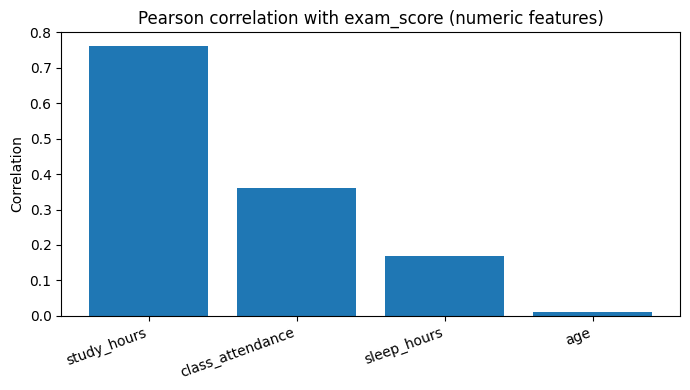

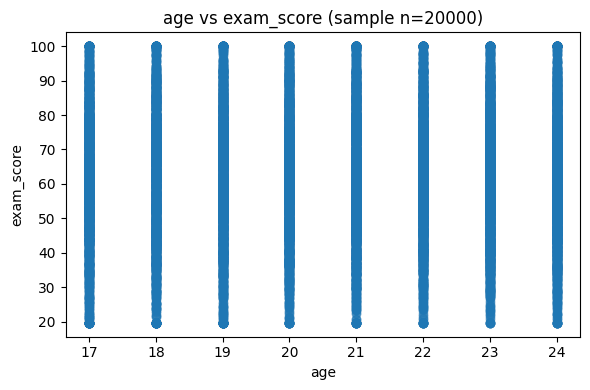

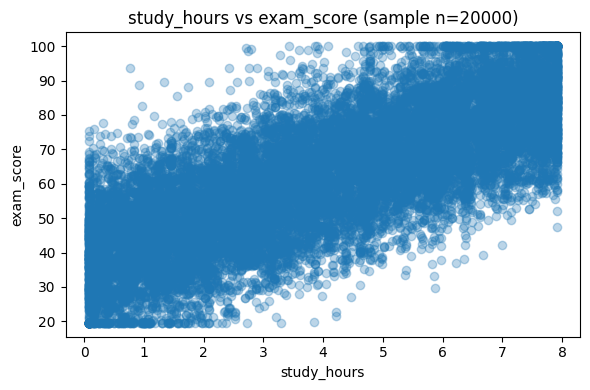

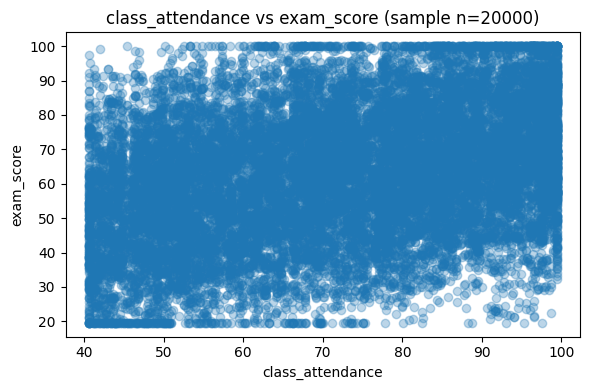

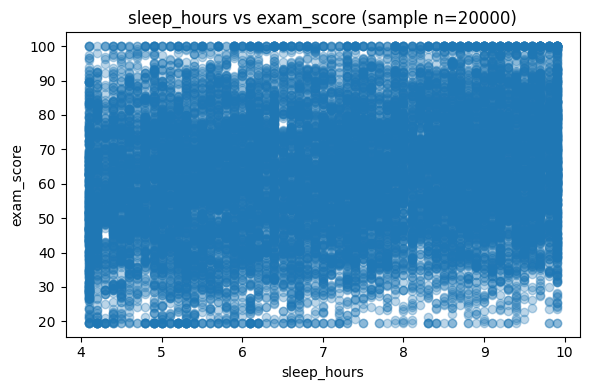

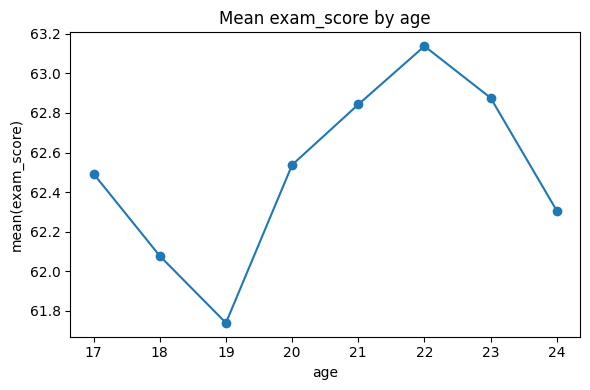

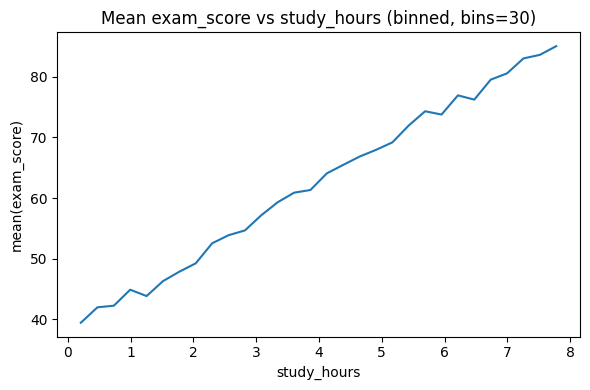

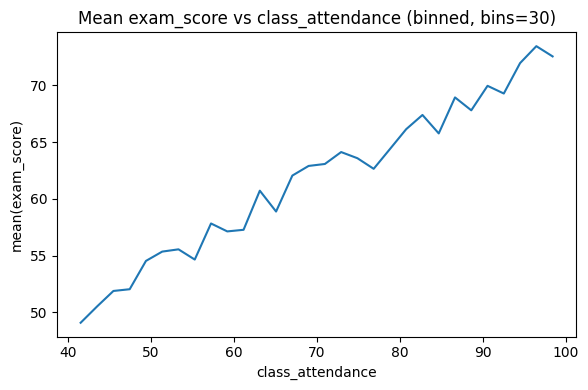

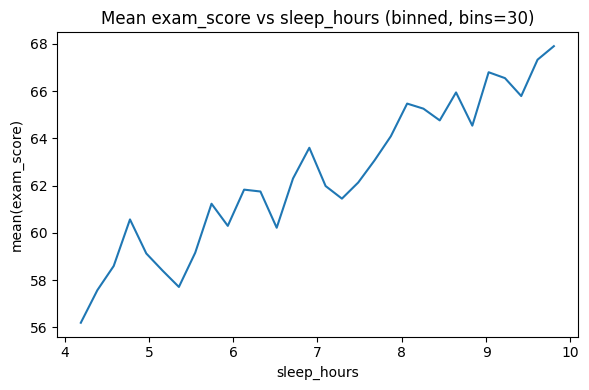

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ====== 설정 ======
TARGET = "exam_score"
NUM_COLS = ["age", "study_hours", "class_attendance", "sleep_hours"]

# ====== 1) 상관계수 (Pearson) ======
corr_df = (
    train[NUM_COLS + [TARGET]]
    .corr(numeric_only=True)[[TARGET]]
    .drop(index=TARGET)
    .sort_values(TARGET, ascending=False)
)

display(corr_df)

# ====== 2) 상관계수 막대그래프 ======
plt.figure(figsize=(7,4))
plt.bar(corr_df.index, corr_df[TARGET].values)
plt.title("Pearson correlation with exam_score (numeric features)")
plt.ylabel("Correlation")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()

# ====== 3) 산점도 (너무 많아서 샘플링) ======
SAMPLE_N = 20000
rng = np.random.RandomState(42)
idx = rng.choice(train.index, size=min(SAMPLE_N, len(train)), replace=False)
sample = train.loc[idx, NUM_COLS + [TARGET]].copy()

for col in NUM_COLS:
    plt.figure(figsize=(6,4))
    plt.scatter(sample[col], sample[TARGET], alpha=0.3)
    plt.xlabel(col)
    plt.ylabel(TARGET)
    plt.title(f"{col} vs {TARGET} (sample n={len(sample)})")
    plt.tight_layout()
    plt.show()

# ====== 4) (추천) Bin 평균 트렌드 라인: 밀집 데이터에 더 보기 좋음 ======
def binned_mean_plot(df, x_col, y_col, bins=30):
    # age처럼 값이 적은 경우(이산형)는 그대로 그룹 평균
    if df[x_col].nunique() <= 20:
        grp = df.groupby(x_col)[y_col].mean().reset_index()
        plt.figure(figsize=(6,4))
        plt.plot(grp[x_col], grp[y_col], marker="o")
        plt.xlabel(x_col)
        plt.ylabel(f"mean({y_col})")
        plt.title(f"Mean {y_col} by {x_col}")
        plt.tight_layout()
        plt.show()
        return

    # 연속형은 구간(bin)으로 평균 추세
    binned = pd.cut(df[x_col], bins=bins)
    grp = df.groupby(binned, observed=False)[y_col].mean()
    mid = [interval.mid for interval in grp.index.categories]

    plt.figure(figsize=(6,4))
    plt.plot(mid, grp.values)
    plt.xlabel(x_col)
    plt.ylabel(f"mean({y_col})")
    plt.title(f"Mean {y_col} vs {x_col} (binned, bins={bins})")
    plt.tight_layout()
    plt.show()

for col in NUM_COLS:
    binned_mean_plot(train, col, TARGET, bins=30)


### 상관계수 확인 (범주형 데이터)

<Figure size 800x400 with 0 Axes>

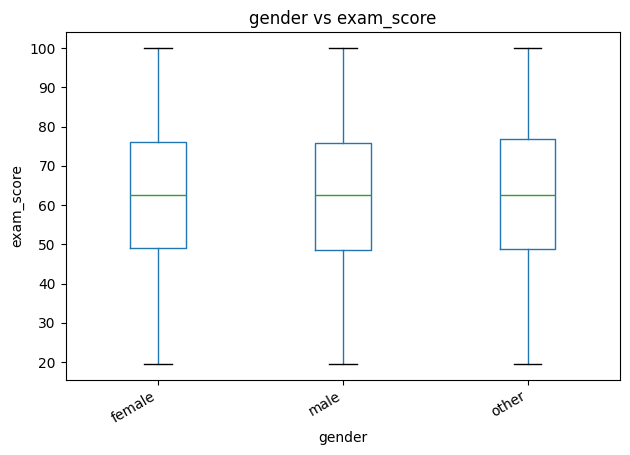

<Figure size 800x400 with 0 Axes>

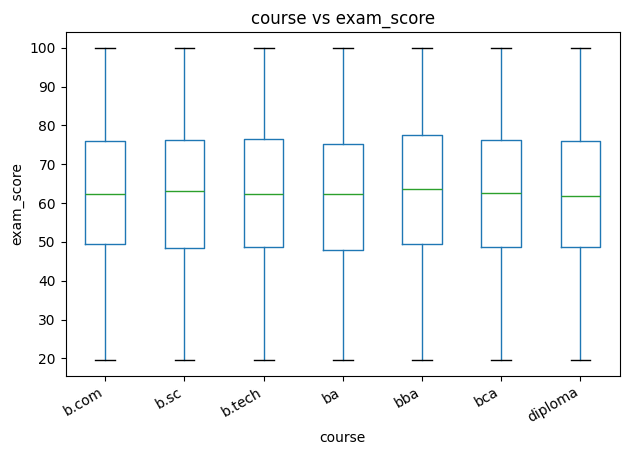

<Figure size 800x400 with 0 Axes>

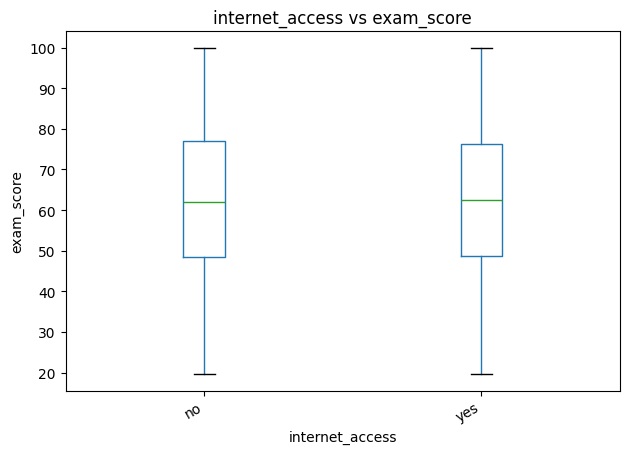

<Figure size 800x400 with 0 Axes>

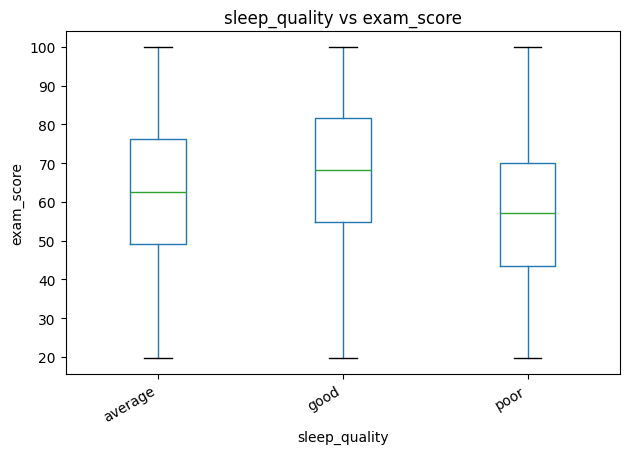

<Figure size 800x400 with 0 Axes>

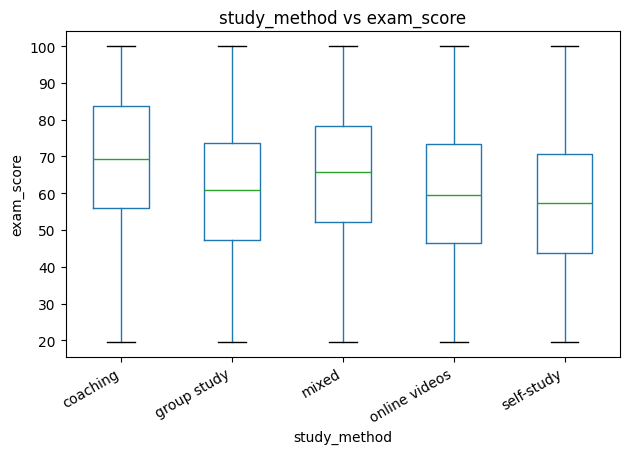

<Figure size 800x400 with 0 Axes>

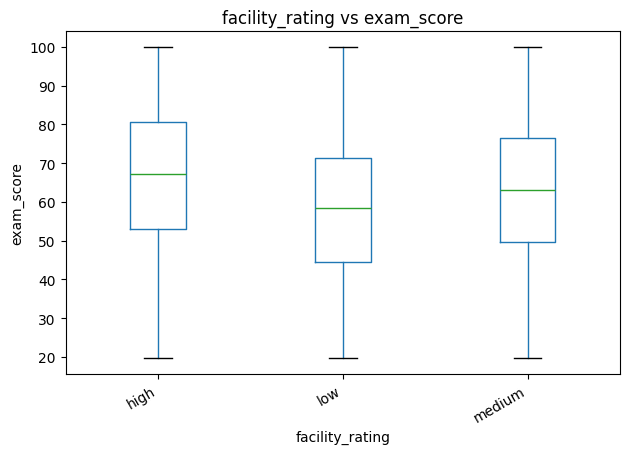

<Figure size 800x400 with 0 Axes>

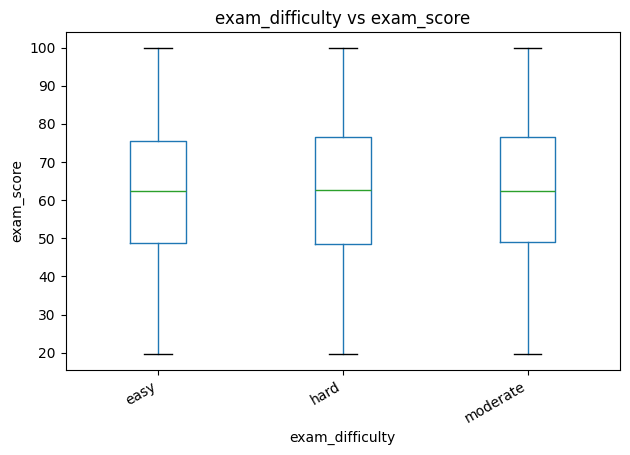

In [6]:
import matplotlib.pyplot as plt

TARGET = "exam_score"
CAT_COLS = [
    "gender",
    "course",
    "internet_access",
    "sleep_quality",
    "study_method",
    "facility_rating",
    "exam_difficulty"
]

for col in CAT_COLS:
    plt.figure(figsize=(8, 4))
    train.boxplot(
        column=TARGET,
        by=col,
        grid=False
    )
    plt.title(f"{col} vs {TARGET}")
    plt.suptitle("")   # pandas 기본 title 제거
    plt.xlabel(col)
    plt.ylabel(TARGET)
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()


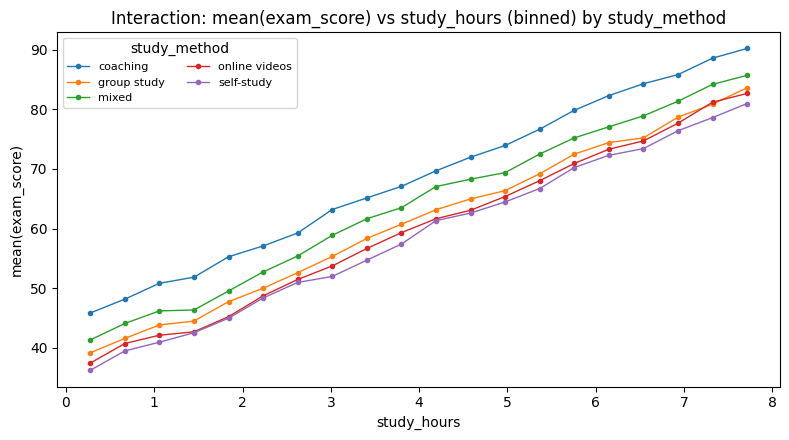

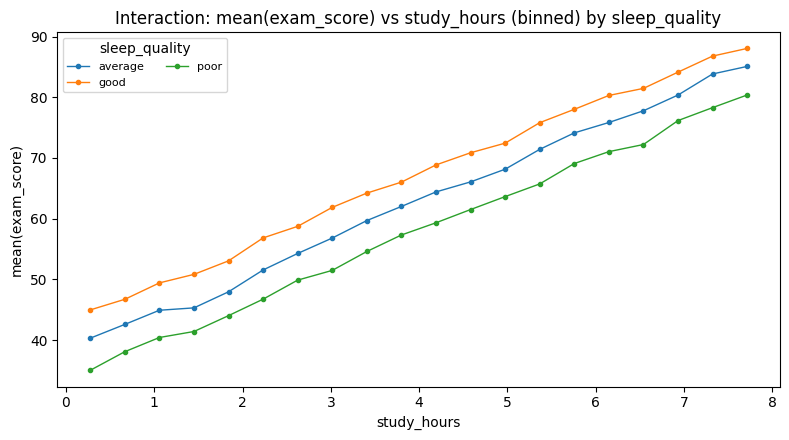

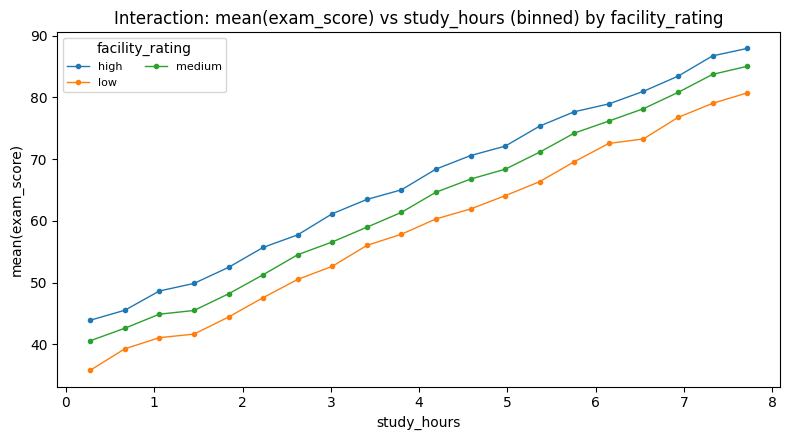

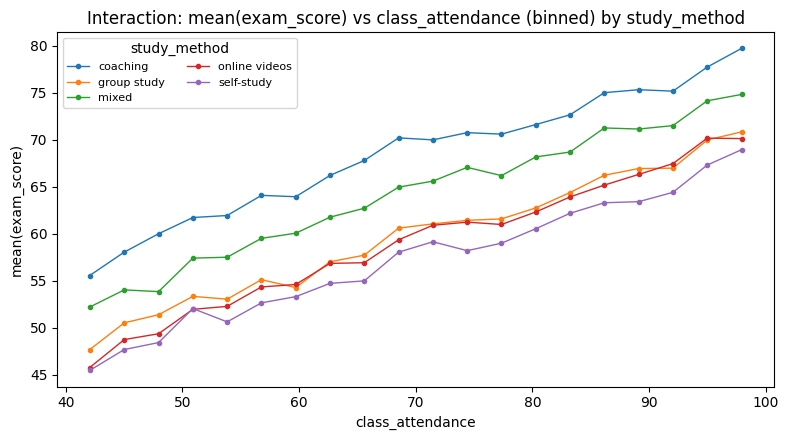

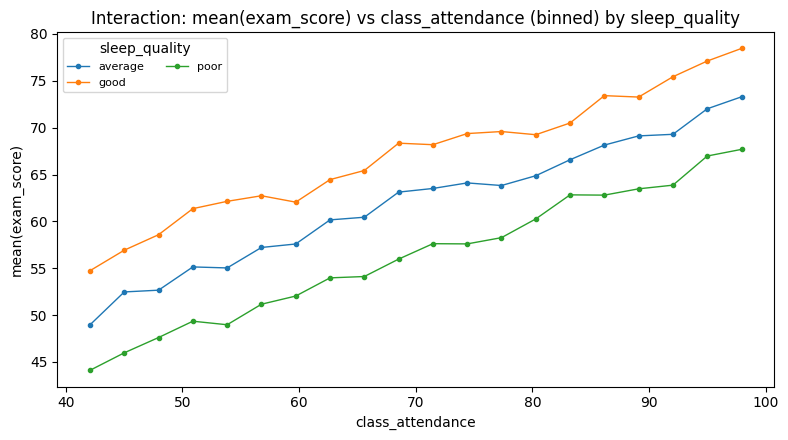

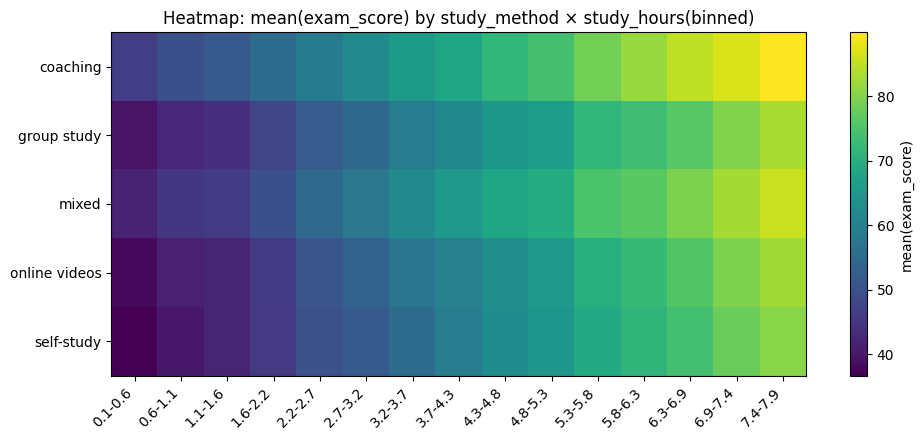

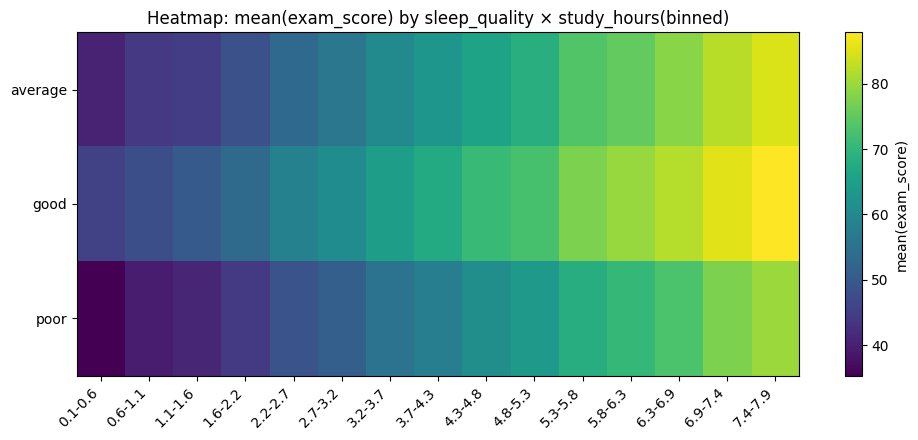

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TARGET = "exam_score"

# 보고 싶은 interaction 조합들
INTERACTIONS = [
    ("study_hours", "study_method"),
    ("study_hours", "sleep_quality"),
    ("study_hours", "facility_rating"),
    ("class_attendance", "study_method"),
    ("class_attendance", "sleep_quality"),
]

# -----------------------------
# 1) Bin 평균 라인플롯 (범주별 선)
# -----------------------------
def binned_interaction_plot(df, x_col, cat_col, y_col, bins=20, min_count_per_bin=300):
    tmp = df[[x_col, cat_col, y_col]].copy()
    tmp["x_bin"] = pd.cut(tmp[x_col], bins=bins)

    grp = (
        tmp.groupby([cat_col, "x_bin"], observed=False)[y_col]
        .agg(mean="mean", count="count")
        .reset_index()
    )

    # bin에 표본이 너무 적으면 제거(노이즈 방지)
    grp = grp[grp["count"] >= min_count_per_bin].copy()

    # bin 구간의 midpoint로 x축 만들기
    mids = {interval: interval.mid for interval in grp["x_bin"].unique()}
    grp["x_mid"] = grp["x_bin"].map(mids)

    plt.figure(figsize=(8, 4.5))
    for cat in grp[cat_col].unique():
        g = grp[grp[cat_col] == cat].sort_values("x_mid")
        plt.plot(g["x_mid"], g["mean"], marker="o", linewidth=1, markersize=3, label=str(cat))

    plt.title(f"Interaction: mean({y_col}) vs {x_col} (binned) by {cat_col}")
    plt.xlabel(x_col)
    plt.ylabel(f"mean({y_col})")
    plt.legend(title=cat_col, ncol=2, fontsize=8)
    plt.tight_layout()
    plt.show()

# -----------------------------
# 2) 히트맵 (범주 × x_bin 평균점수)
# -----------------------------
def interaction_pivot_heat(df, x_col, cat_col, y_col, bins=15):
    tmp = df[[x_col, cat_col, y_col]].copy()
    tmp["x_bin"] = pd.cut(tmp[x_col], bins=bins)

    pivot = tmp.pivot_table(
        index=cat_col,
        columns="x_bin",
        values=y_col,
        aggfunc="mean",
        observed=False
    )

    plt.figure(figsize=(10, 4.5))
    plt.imshow(pivot.values, aspect="auto")
    plt.colorbar(label=f"mean({y_col})")
    plt.yticks(range(len(pivot.index)), pivot.index)
    plt.xticks(
        range(len(pivot.columns)),
        [f"{c.left:.1f}-{c.right:.1f}" for c in pivot.columns],
        rotation=45, ha="right"
    )
    plt.title(f"Heatmap: mean({y_col}) by {cat_col} × {x_col}(binned)")
    plt.tight_layout()
    plt.show()

    return pivot

# -----------------------------
# 실행
# -----------------------------
for x_col, cat_col in INTERACTIONS:
    binned_interaction_plot(train, x_col, cat_col, TARGET, bins=20, min_count_per_bin=300)

# 가장 핵심 2개는 히트맵으로도 보기
_ = interaction_pivot_heat(train, "study_hours", "study_method", TARGET, bins=15)
_ = interaction_pivot_heat(train, "study_hours", "sleep_quality", TARGET, bins=15)


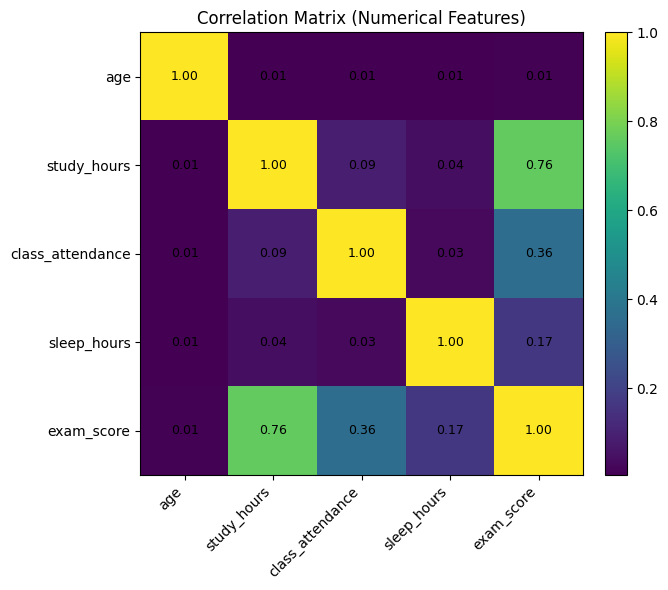

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 수치형 컬럼만 선택
num_cols = [
    "age",
    "study_hours",
    "class_attendance",
    "sleep_hours",
    "exam_score"
]

# 상관계수 계산
corr = train[num_cols].corr()

# 히트맵 형태로 시각화
plt.figure(figsize=(7, 6))
im = plt.imshow(corr.values)

# 컬러바
plt.colorbar(im, fraction=0.046, pad=0.04)

# 축 라벨
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha="right")
plt.yticks(range(len(num_cols)), num_cols)

# 셀 안에 값 표시
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        plt.text(
            j, i,
            f"{corr.values[i, j]:.2f}",
            ha="center",
            va="center",
            fontsize=9
        )

plt.title("Correlation Matrix (Numerical Features)")
plt.tight_layout()
plt.show()


exam_score 기준 상관 Top-N (Numerical)

,correlation_with_exam_score
study_hours,0.762267
class_attendance,0.360954
sleep_hours,0.167410
age,0.010472
id,0.000372


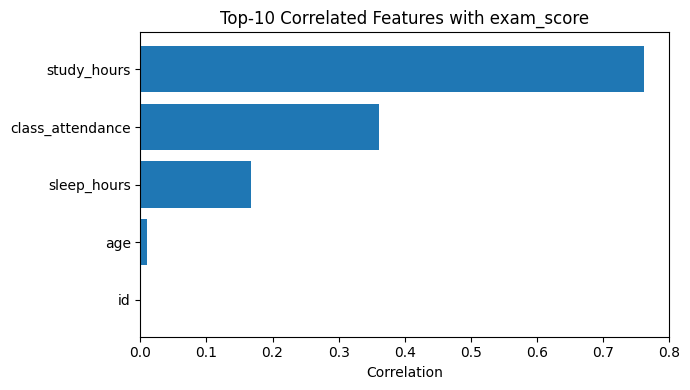

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

TARGET = "exam_score"

# 수치형 컬럼 자동 추출
num_cols = train.select_dtypes(include=["int64", "float64"]).columns.tolist()

# target 제외
num_cols = [c for c in num_cols if c != TARGET]

# exam_score와의 상관계수 계산
corr_target = (
    train[num_cols + [TARGET]]
    .corr()[TARGET]
    .drop(TARGET)
    .sort_values(key=lambda x: x.abs(), ascending=False)
)

# ---- Top-N 설정 ----
TOP_N = 10
top_corr = corr_target.head(TOP_N)

display(top_corr.to_frame(name="correlation_with_exam_score"))

# ---- 시각화 ----
plt.figure(figsize=(7, 4))
plt.barh(top_corr.index[::-1], top_corr.values[::-1])
plt.xlabel("Correlation")
plt.title(f"Top-{TOP_N} Correlated Features with exam_score")
plt.tight_layout()
plt.show()


,correlation_with_exam_score
study_hours,0.762267
class_attendance,0.360954
sleep_quality_te,0.236940
study_method_te,0.223769
facility_rating_te,0.188941
sleep_hours,0.167410
course_te,0.016592
gender_te,0.012850
age,0.010472
exam_difficulty_te,0.009098


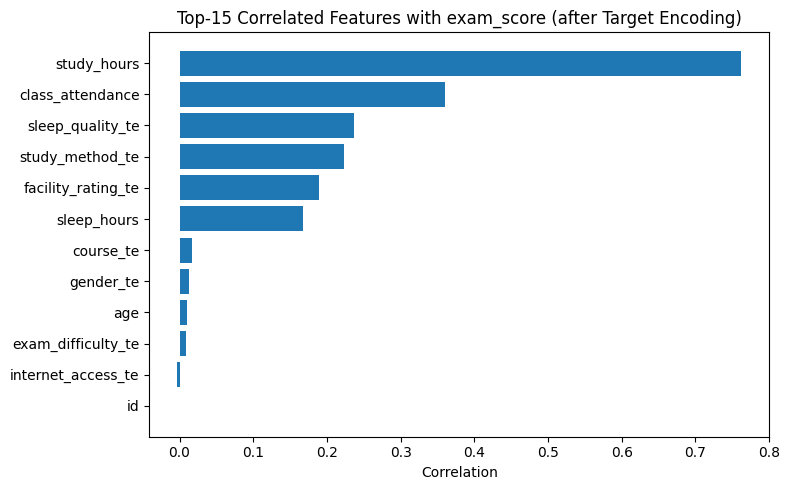

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TARGET = "exam_score"
CAT_COLS = [
    "gender", "course", "internet_access",
    "sleep_quality", "study_method",
    "facility_rating", "exam_difficulty"
]

# =========================
# 1) KFold OOF Target Encoding (leakage 방지)
# =========================
def target_encode_oof(df, cat_cols, target, n_splits=5, seed=42, smoothing=20):
    """
    df: train dataframe (target 포함)
    smoothing: 값 클수록 global mean 쪽으로 더 끌림(희소 범주 안정화)
    return: (encoded_df, encoding_maps, global_mean)
    - encoded_df: cat_col별로 {cat_col}_te 컬럼 추가된 df
    - encoding_maps: 전체 train 기준 encoding map(테스트 변환용)
    """
    rng = np.random.RandomState(seed)
    idx = np.arange(len(df))
    rng.shuffle(idx)
    folds = np.array_split(idx, n_splits)

    global_mean = df[target].mean()
    out = pd.DataFrame(index=df.index)

    for col in cat_cols:
        oof = pd.Series(index=df.index, dtype=float)

        for k in range(n_splits):
            val_idx = folds[k]
            tr_idx = np.concatenate([folds[i] for i in range(n_splits) if i != k])

            tr = df.iloc[tr_idx]
            val = df.iloc[val_idx]

            stats = tr.groupby(col)[target].agg(["mean", "count"])
            # smoothing 적용
            smooth_mean = (stats["mean"] * stats["count"] + global_mean * smoothing) / (stats["count"] + smoothing)

            oof.iloc[val_idx] = val[col].map(smooth_mean).fillna(global_mean).values

        out[f"{col}_te"] = oof

    # 전체 train으로 만든 map (테스트 적용용)
    encoding_maps = {}
    for col in cat_cols:
        stats = df.groupby(col)[target].agg(["mean", "count"])
        smooth_mean = (stats["mean"] * stats["count"] + global_mean * smoothing) / (stats["count"] + smoothing)
        encoding_maps[col] = smooth_mean

    return out, encoding_maps, global_mean


# 실행: OOF target encoding
te_train, te_maps, global_mean = target_encode_oof(
    train, CAT_COLS, TARGET,
    n_splits=5, seed=42, smoothing=20
)

# 원본 수치형 + TE 컬럼 합치기
num_cols = train.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols = [c for c in num_cols if c != TARGET]

tmp = pd.concat([train[num_cols + [TARGET]].reset_index(drop=True),
                 te_train.reset_index(drop=True)], axis=1)

# =========================
# 2) exam_score 기준 상관 Top-N (TE 포함)
# =========================
corr_target = (
    tmp.corr(numeric_only=True)[TARGET]
    .drop(TARGET)
    .sort_values(key=lambda x: x.abs(), ascending=False)
)

TOP_N = 15
top_corr = corr_target.head(TOP_N)

display(top_corr.to_frame(name="correlation_with_exam_score"))

# 시각화
plt.figure(figsize=(8, 5))
plt.barh(top_corr.index[::-1], top_corr.values[::-1])
plt.xlabel("Correlation")
plt.title(f"Top-{TOP_N} Correlated Features with exam_score (after Target Encoding)")
plt.tight_layout()
plt.show()


### 최종 전처리 파이프라인

In [11]:
import pandas as pd
import numpy as np

TARGET = "exam_score"

NUM_FEATURES = [
    "study_hours",
    "class_attendance",
    "sleep_hours",
]

CAT_FEATURES = [
    "sleep_quality",
    "study_method",
    "facility_rating",
]

# 전체 평균
global_mean = train[TARGET].mean()

def target_encode(train, test, col, target, smoothing=20):
    stats = train.groupby(col)[target].agg(["mean", "count"])
    smooth = (stats["mean"] * stats["count"] + global_mean * smoothing) / (
        stats["count"] + smoothing
    )

    train_te = train[col].map(smooth).fillna(global_mean)
    test_te  = test[col].map(smooth).fillna(global_mean)

    return train_te, test_te


In [12]:
train_te = pd.DataFrame(index=train.index)
test_te  = pd.DataFrame(index=test.index)

for col in CAT_FEATURES:
    train_te[f"{col}_te"], test_te[f"{col}_te"] = target_encode(
        train, test, col, TARGET, smoothing=20
    )


In [13]:
X_train = pd.concat(
    [
        train[NUM_FEATURES].reset_index(drop=True),
        train_te.reset_index(drop=True),
    ],
    axis=1,
)

y_train = train[TARGET]

X_test = pd.concat(
    [
        test[NUM_FEATURES].reset_index(drop=True),
        test_te.reset_index(drop=True),
    ],
    axis=1,
)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("Final features:")
print(X_train.columns.tolist())


X_train shape: (630000, 6)
X_test shape : (270000, 6)
Final features:
['study_hours', 'class_attendance', 'sleep_hours', 'sleep_quality_te', 'study_method_te', 'facility_rating_te']
